<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/PREDICTION_DU_PRIX_D'UN_ACTIF_FINANCIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelisation des series temporelles avec python

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
cac40 = pd.read_html("https://en.wikipedia.org/wiki/CAC_40")[4]
cac40.head()

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA


In [4]:
# récupération des tickers
tickers = (cac40['Ticker'])
tickers

0        AI.PA
1       AIR.PA
2       ALO.PA
3        MT.AS
4        CS.PA
5       BNP.PA
6        EN.PA
7       CAP.PA
8        CA.PA
9       ACA.PA
10       BN.PA
11      DSY.PA
12     EDEN.PA
13     ENGI.PA
14       EL.PA
15      ERF.PA
16      RMS.PA
17      KER.PA
18       OR.PA
19       LR.PA
20       MC.PA
21       ML.PA
22      ORA.PA
23       RI.PA
24      PUB.PA
25      RNO.PA
26      SAF.PA
27      SGO.PA
28      SAN.PA
29       SU.PA
30      GLE.PA
31    STLAP.PA
32    STMPA.PA
33      TEP.PA
34       HO.PA
35      TTE.PA
36      URW.PA
37      VIE.PA
38       DG.PA
39      WLN.PA
Name: Ticker, dtype: object

In [5]:
! pip install pandas_datareader
from pandas_datareader import DataReader, get_quote_yahoo

In [6]:
import yfinance as yf

# Liste des symboles boursiers
tickers

# Créer un objet Ticker pour chaque symbole
ticker_objects = [yf.Ticker(ticker) for ticker in tickers]

# Obtenir la capitalisation boursière de chaque symbole
market_caps = [ticker.info['marketCap'] for ticker in ticker_objects]

# Afficher la capitalisation boursière
for i in range(len(tickers)):
    print(f"Capitalisation boursière de {tickers[i]} : {market_caps[i]}")


Capitalisation boursière de AI.PA : 81637621760
Capitalisation boursière de AIR.PA : 98393792512
Capitalisation boursière de ALO.PA : 8642574336
Capitalisation boursière de MT.AS : 19835351040
Capitalisation boursière de CS.PA : 62317477888
Capitalisation boursière de BNP.PA : 67668668416
Capitalisation boursière de EN.PA : 12077244416
Capitalisation boursière de CAP.PA : 28401090560
Capitalisation boursière de CA.PA : 11541687296
Capitalisation boursière de ACA.PA : 34821345280
Capitalisation boursière de BN.PA : 34705477632
Capitalisation boursière de DSY.PA : 46507565056
Capitalisation boursière de EDEN.PA : 14371878912
Capitalisation boursière de ENGI.PA : 35449462784
Capitalisation boursière de EL.PA : 73821863936
Capitalisation boursière de ERF.PA : 9981830144
Capitalisation boursière de RMS.PA : 180840562688
Capitalisation boursière de KER.PA : 53022982144
Capitalisation boursière de OR.PA : 210688000000
Capitalisation boursière de LR.PA : 22017896448
Capitalisation boursière de

In [7]:
market_caps = pd.DataFrame(market_caps)
market_caps.head()


,0
0,81637621760
1,98393792512
2,8642574336
3,19835351040
4,62317477888


In [8]:
cac40['Market capitalisation'] = market_caps.values
cac40['Market capitalisation'] = cac40['Market capitalisation'] / 1000000000
cac40.head()


,Company,Sector,GICS Sub-Industry,Ticker,Market capitalisation
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA,81.637622
1,Airbus,Industrials,Aerospace & Defense,AIR.PA,98.393793
2,Alstom,Industrials,Rail Transport,ALO.PA,8.642574
3,ArcelorMittal,Basic Materials,Steel,MT.AS,19.835351
4,AXA,Financial Services,Life & Health Insurance,CS.PA,62.317478


In [9]:
# regroupement par secteur
# Mettre les indices comme index
cac40.set_index('Ticker', inplace=True)
cac40

,Company,Sector,GICS Sub-Industry,Market capitalisation
Ticker,,,,
AI.PA,Air Liquide,Basic Materials,Industrial Gases,81.637622
AIR.PA,Airbus,Industrials,Aerospace & Defense,98.393793
ALO.PA,Alstom,Industrials,Rail Transport,8.642574
MT.AS,ArcelorMittal,Basic Materials,Steel,19.835351
CS.PA,AXA,Financial Services,Life & Health Insurance,62.317478
BNP.PA,BNP Paribas,Financial Services,Diversified Banks,67.668668
EN.PA,Bouygues,Industrials,Construction & Engineering,12.077244
CAP.PA,Capgemini,Technology,IT Consulting & Other Services,28.401091
CA.PA,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,11.541687


In [10]:
# Regrouper les entreprises par sceteur
compasant = cac40.groupby('Sector')["Market capitalisation"].nlargest(1)
compasant

Sector                  Ticker 
Basic Materials         AI.PA       81.637622
Communication Services  ORA.PA      28.916683
Consumer Cyclical       MC.PA      365.884211
Consumer Defensive      OR.PA      210.688000
Energy                  TTE.PA     149.265351
Financial Services      BNP.PA      67.668668
Healthcare              SAN.PA     126.607548
Industrials             AIR.PA      98.393793
Real Estate             URW.PA       6.416943
Technology              DSY.PA      46.507565
Utilities               ENGI.PA     35.449463
Name: Market capitalisation, dtype: float64

In [11]:
# Transformons le resultat en un data frame
compasant = pd.DataFrame(compasant)
compasant
# ou
compasant = compasant.reset_index()
compasant

,Sector,Ticker,Market capitalisation
0,Basic Materials,AI.PA,81.637622
1,Communication Services,ORA.PA,28.916683
2,Consumer Cyclical,MC.PA,365.884211
3,Consumer Defensive,OR.PA,210.688000
4,Energy,TTE.PA,149.265351
5,Financial Services,BNP.PA,67.668668
6,Healthcare,SAN.PA,126.607548
7,Industrials,AIR.PA,98.393793
8,Real Estate,URW.PA,6.416943
9,Technology,DSY.PA,46.507565


In [12]:
# La plus grande entreprise tout secteur
compasant.sort_values(by='Market capitalisation', ascending=False)


,Sector,Ticker,Market capitalisation
2,Consumer Cyclical,MC.PA,365.884211
3,Consumer Defensive,OR.PA,210.688000
4,Energy,TTE.PA,149.265351
6,Healthcare,SAN.PA,126.607548
7,Industrials,AIR.PA,98.393793
0,Basic Materials,AI.PA,81.637622
5,Financial Services,BNP.PA,67.668668
9,Technology,DSY.PA,46.507565
10,Utilities,ENGI.PA,35.449463
1,Communication Services,ORA.PA,28.916683


On a distinctement 11 secteur dans l'indice Caca 40. Et le secteur qui a la plus grosse capitalisation boursière est LVMH.
La suite de notre étude serra basée sur les prix des actions des plus grandes capitalisations boursières.

In [13]:
# Recupérons les sympboles de chaque entreprise
symbols = compasant['Ticker'].to_list()
symbols

['AI.PA',
 'ORA.PA',
 'MC.PA',
 'OR.PA',
 'TTE.PA',
 'BNP.PA',
 'SAN.PA',
 'AIR.PA',
 'URW.PA',
 'DSY.PA',
 'ENGI.PA']

In [14]:
import yfinance as yf
import datetime

# Dates de début et de fin pour la récupération des données
start_date=datetime.datetime(2000, 1, 1)

# Récupération des données sur les prix pour les symboles spécifiés
stocks_data = yf.download(symbols, start=start_date)

# Sélection de la colonne 'Adj Close' pour les prix
stocks_prices = stocks_data['Adj Close']



[*********************100%%**********************]  11 of 11 completed


In [15]:
stocks_prices = stocks_data['Adj Close']
stocks_prices.head()

,AI.PA,AIR.PA,BNP.PA,DSY.PA,ENGI.PA,MC.PA,OR.PA,ORA.PA,SAN.PA,TTE.PA,URW.PA
Date,,,,,,,,,,,
2000-01-03,16.056761,NaN,14.079916,5.639937,9.422717,56.995655,52.997398,36.521858,18.505684,10.044760,NaN
2000-01-04,15.344179,NaN,13.684154,5.084237,9.257717,51.604172,49.235851,34.570316,17.354830,9.679496,NaN
2000-01-05,15.201664,NaN,13.394943,4.690270,9.128070,49.858356,47.556602,32.758156,16.622889,9.435995,NaN
2000-01-06,16.294287,NaN,12.938300,4.748330,9.251824,49.293537,49.370205,32.339966,17.262762,9.162043,NaN
2000-01-07,16.094757,NaN,13.105737,4.976416,9.075036,49.293537,50.377750,33.315746,18.183439,9.207699,NaN


# Construction du modèle
On va créer un modèle de machine learning capable de prédire le prix des actions de LVMH en fonction du prix des autres actions.


In [16]:
from pandas._libs.tslibs import period
# La varible cible
period = 5
y = stocks_prices['MC.PA'].shift(-period).pct_change(period)
y.name ='LVMH_close_future_pct'
y

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2023-10-13    0.014684
2023-10-16    0.004797
2023-10-17    0.002843
2023-10-18    0.003894
2023-10-19    0.000000
Name: LVMH_close_future_pct, Length: 6119, dtype: float64

In [17]:
# suprimons les valeurs manquantes
y.dropna(inplace=True)
y

Date
2000-01-10    0.161919
2000-01-11    0.093138
2000-01-12    0.032864
2000-01-13   -0.019912
2000-01-14   -0.078723
                ...   
2023-10-13    0.014684
2023-10-16    0.004797
2023-10-17    0.002843
2023-10-18    0.003894
2023-10-19    0.000000
Name: LVMH_close_future_pct, Length: 6114, dtype: float64

## Calcule des moyennes mobliles
La moyenne mobile en finance donne le cours moyen d'une valeur sur une période donnée. Elle est appelée mobile car son calcul est effectué jour après jour.

La moyenne mobile est un concept couramment utilisé en finance et en analyse des séries chronologiques. Il s'agit d'une technique qui permet de lisser les données en calculant régulièrement la moyenne des valeurs sur une période donnée. En finance, la moyenne mobile est souvent utilisée pour analyser les tendances des prix d'actifs financiers, tels que les actions, les devises ou les matières premières.

Il existe deux types de moyennes mobiles couramment utilisées en finance :

1. **Moyenne Mobile Simple (SMA - Simple Moving Average)** : La SMA est la moyenne des prix sur une période donnée. Par exemple, une SMA sur 50 jours (SMA50) est calculée en prenant la moyenne des prix de clôture des 50 derniers jours. Elle est utilisée pour lisser les fluctuations à court terme et aider à identifier les tendances à plus long terme.

   La formule de la SMA pour une période de n est la suivante :
   
   **SMA(n) = (Prix(t) + Prix(t-1) + ... + Prix(t-n+1)) / n**

2. **Moyenne Mobile Exponentielle (EMA - Exponential Moving Average)** : L'EMA est similaire à la SMA, mais elle accorde plus de poids aux données les plus récentes. Cela signifie que les prix les plus récents ont un impact plus important sur l'EMA que les prix plus anciens. L'EMA est considérée comme plus réactive aux changements récents du prix.

   La formule de l'EMA pour une période de n est la suivante :
   
   **EMA(n) = (Prix(t) - EMA précédente) * (2 / (n + 1)) + EMA précédente**

En finance, les moyennes mobiles sont utilisées pour diverses raisons, notamment :

- Identifier les tendances du marché : Les croisements entre différentes moyennes mobiles, comme le croisement d'une SMA à court terme avec une SMA à long terme, peuvent indiquer des changements potentiels de tendance.

- Générer des signaux de trading : Les traders utilisent les moyennes mobiles pour générer des signaux d'achat ou de vente. Par exemple, un croisement à la hausse d'une SMA à court terme avec une SMA à long terme peut être considéré comme un signal d'achat.

- Lisser les données : Les moyennes mobiles lissent les fluctuations des prix, ce qui peut rendre les tendances plus visibles et éliminer le bruit à court terme.

- Prévisions : Les moyennes mobiles peuvent être utilisées pour faire des prévisions à court terme en extrapolant la tendance actuelle.

Il est important de noter que les moyennes mobiles ont leurs limites, et elles peuvent donner de faux signaux en période de volatilité ou de range. Par conséquent, il est souvent recommandé de les utiliser en conjonction avec d'autres indicateurs et méthodes d'analyse pour prendre des décisions éclairées en matière de trading et d'investissement.

In [18]:
# Les moyennes mobiles de 5, 14, 39, 50 et 200 jours.
X_SMA_EMA = pd.DataFrame()
for n in [5, 14, 39, 50, 200]:
  # Création des indicateurs de moyenne mobile et division par le prix de cloture
  X_SMA_EMA['sma' + str(n)]= (stocks_prices['MC.PA'].rolling(window=n).mean()) / stocks_prices['MC.PA']
  # création des indicateurs de moyenne mobile exponentielle et division par le prix de cloture
  X_SMA_EMA['ema' + str(n)]= pd.Series(stocks_prices['MC.PA'].ewm(span=n, min_periods =n).mean())  / stocks_prices['MC.PA']

X_SMA_EMA


,sma5,ema5,sma14,ema14,sma39,ema39,sma50,ema50,sma200,ema200
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.042917,1.019135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-13,1.049319,1.038191,1.067536,1.067025,1.118692,1.114616,1.140651,1.131361,1.222161,1.173496
2023-10-16,1.026023,1.018717,1.053290,1.049078,1.103060,1.098568,1.125073,1.115619,1.210091,1.160449
2023-10-17,1.004548,1.011157,1.048004,1.040766,1.096234,1.091609,1.118731,1.109000,1.207521,1.156618


## Le RSI en bourse
Le RSI (Relative Strength Index) est un indicateur qui permet de savoir si une action est surachetée ou survendue. Lorsque sa valeur est supérieure à 70, on parle souvent d'une situation de surachat. Même si certains traders utilisent le niveau 80 comme seuil.

In [19]:
from pandas_datareader.compat import com
# Le RSI de  5, 14, 39, 50 et 200 jours.

def RSI(series, periode):
  delta=series.diff().dropna()
  u = delta*0
  d=u.copy()
  u[delta>0]=delta[delta> 0]
  d[delta<0]=delta[delta <0]
  u[u.index[period-1]] = np.mean( u[:period] )
  u=u.drop(u.index[:(period-1)])
  d[d.index[period-1]] = np.mean( u[:period] )
  d=d.drop(d.index[:(period-1)])
  rs=u.ewm(com=period-1, adjust=False).mean() / d.ewm(com=period-1, adjust=False).mean()
  return 100 -100/(1 + rs)

x_RSI = pd.DataFrame()
for n in [5, 14, 39, 50, 200]:
  x_RSI['RSI' + str(n)] = RSI(stocks_prices['MC.PA'], n)

x_RSI


,RSI5,RSI14,RSI39,RSI50,RSI200
Date,,,,,
2000-01-10,18.153262,18.153262,18.153262,18.153262,18.153262
2000-01-11,26.214638,26.214638,26.214638,26.214638,26.214638
2000-01-12,42.540203,42.540203,42.540203,42.540203,42.540203
2000-01-13,58.942433,58.942433,58.942433,58.942433,58.942433
2000-01-14,67.075594,67.075594,67.075594,67.075594,67.075594
...,...,...,...,...,...
2023-10-13,-45.517274,-45.517274,-45.517274,-45.517274,-45.517274
2023-10-16,-77.430921,-77.430921,-77.430921,-77.430921,-77.430921
2023-10-17,-87.723816,-87.723816,-87.723816,-87.723816,-87.723816


## Importation du volume d'action LVMH négocié.
Alors que les prix représentent le consensus sur une valeur, les volumes représentent l'implication émotionnelle des intervenants, la force qui met en mouvement les prix.
Il serait interrressant de l'intégrer dans notre modèlisation.

In [25]:
# Récupération des volumes des actions LVMH
lvmh_data = yf.download('MC.PA', start='2000-01-01')
lvmh_vol = lvmh_data['Volume']
lvmh_vol

[*********************100%%**********************]  1 of 1 completed


Date
2000-01-03     615855
2000-01-04    1691700
2000-01-05    1563735
2000-01-06    1641215
2000-01-07    1360530
               ...   
2023-10-13     442278
2023-10-16     381824
2023-10-17     319434
2023-10-18     350645
2023-10-19      87790
Name: Volume, Length: 6097, dtype: int64

In [26]:
# Les variables liées au volume d'action LVMH
x_volume=pd.DataFrame()
x_volume['Adj_volume_id_change'] = lvmh_vol.pct_change()
x_volume['Adj_volume_id_change']

Date
2000-01-03         NaN
2000-01-04    1.746913
2000-01-05   -0.075643
2000-01-06    0.049548
2000-01-07   -0.171023
                ...   
2023-10-13   -0.295881
2023-10-16   -0.136688
2023-10-17   -0.163400
2023-10-18    0.097707
2023-10-19   -0.749633
Name: Adj_volume_id_change, Length: 6097, dtype: float64

In [27]:
x_volume['Adj_volume_id_change_SMA'] = (x_volume['Adj_volume_id_change'].rolling(window=5).mean())
x_volume

,Adj_volume_id_change,Adj_volume_id_change_SMA
Date,,
2000-01-03,NaN,NaN
2000-01-04,1.746913,NaN
2000-01-05,-0.075643,NaN
2000-01-06,0.049548,NaN
2000-01-07,-0.171023,NaN
...,...,...
2023-10-13,-0.295881,0.298550
2023-10-16,-0.136688,0.282651
2023-10-17,-0.163400,0.179976


On va récupérer les caractéristiques des autres actions sans celles de LVMH.

In [28]:
# Caractéristique des 5 jours des autres actions de la data frame stock price

X_lags_others_stocks = pd.concat(
    [stocks_prices[stk].shift(period).pct_change() for stk in symbols if stk != 'MC.PA']
,
    axis = 1)

X_lags_others_stocks.columns=[i+'_DT' for i in symbols if i != 'MC.PA']
X_lags_others_stocks.dropna(inplace=True)
X_lags_others_stocks

,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.PA_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,
2023-04-24,0.009845,0.010481,0.005943,0.000170,-0.020205,0.004312,0.014254,-0.022472,-0.001457,0.008752
2023-04-25,0.005124,0.006153,0.002718,-0.001362,0.020966,-0.010734,0.001874,-0.008323,0.004376,0.005127
2023-04-26,0.005223,0.001573,-0.004714,-0.009889,0.003198,0.005721,0.001559,-0.005396,-0.010298,0.009678
2023-04-27,0.003835,0.002268,0.017168,-0.008438,-0.012584,-0.004512,0.005913,-0.015069,-0.005736,-0.001166
2023-04-28,0.003697,0.004003,0.030381,0.002084,-0.003229,0.013596,-0.015161,-0.005508,0.007111,0.003372
...,...,...,...,...,...,...,...,...,...,...
2023-10-13,0.007661,-0.000364,0.007282,0.009537,0.013176,-0.006417,0.006153,0.008270,0.030785,-0.000566
2023-10-16,0.002914,0.001275,-0.018138,0.017401,-0.015839,0.003718,-0.009656,-0.001995,-0.014038,0.010331
2023-10-17,0.021731,0.000364,0.027645,0.008145,0.013552,0.000975,0.020474,0.017548,0.027080,0.020451


In [29]:
# Rassablons toutes les caractéristiques dans une meme base de données
x = pd.concat([X_SMA_EMA, x_RSI, x_volume, X_lags_others_stocks], axis = 1)
x.head()

,sma5,ema5,sma14,ema14,sma39,ema39,sma50,ema50,sma200,ema200,...,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.PA_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.042917,1.019135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# ajoutons la variable cible
clean_data =pd.concat([y,x], axis=1).dropna()
clean_data.head()

,LVMH_close_future_pct,sma5,ema5,sma14,ema14,sma39,ema39,sma50,ema50,sma200,...,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.PA_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-24,-0.029385,0.989379,0.990372,0.962821,0.966600,0.919438,0.930360,0.914523,0.919283,0.797427,...,0.009845,0.010481,0.005943,0.000170,-0.020205,0.004312,0.014254,-0.022472,-0.001457,0.008752
2023-04-25,-0.011468,0.999816,0.997739,0.973047,0.976328,0.928132,0.939407,0.922485,0.928010,0.804088,...,0.005124,0.006153,0.002718,-0.001362,0.020966,-0.010734,0.001874,-0.008323,0.004376,0.005127
2023-04-26,-0.001942,1.015182,1.009130,0.991139,0.993017,0.945686,0.956709,0.938869,0.945092,0.818523,...,0.005223,0.001573,-0.004714,-0.009889,0.003198,0.005721,0.001559,-0.005396,-0.010298,0.009678
2023-04-27,-0.000228,1.010377,1.004783,0.992398,0.992280,0.946515,0.957112,0.938711,0.945486,0.818485,...,0.003835,0.002268,0.017168,-0.008438,-0.012584,-0.004512,0.005913,-0.015069,-0.005736,-0.001166
2023-04-28,0.015499,1.012147,1.007880,1.003312,0.999332,0.955291,0.965625,0.946543,0.953986,0.825664,...,0.003697,0.004003,0.030381,0.002084,-0.003229,0.013596,-0.015161,-0.005508,0.007111,0.003372


En finance on ne prédit pas la valeur absolue du prix mais plutot le rendement de l'action.

In [31]:
days_of_week = pd.get_dummies(clean_data.index.dayofweek, prefix='weekday', drop_first=True)
days_of_week.index = clean_data.index
clean_data = pd.concat([clean_data, days_of_week] , axis = 1)
clean_data

,LVMH_close_future_pct,sma5,ema5,sma14,ema14,sma39,ema39,sma50,ema50,sma200,...,BNP.PA_DT,SAN.PA_DT,AIR.PA_DT,URW.PA_DT,DSY.PA_DT,ENGI.PA_DT,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-24,-0.029385,0.989379,0.990372,0.962821,0.966600,0.919438,0.930360,0.914523,0.919283,0.797427,...,-0.020205,0.004312,0.014254,-0.022472,-0.001457,0.008752,0,0,0,0
2023-04-25,-0.011468,0.999816,0.997739,0.973047,0.976328,0.928132,0.939407,0.922485,0.928010,0.804088,...,0.020966,-0.010734,0.001874,-0.008323,0.004376,0.005127,1,0,0,0
2023-04-26,-0.001942,1.015182,1.009130,0.991139,0.993017,0.945686,0.956709,0.938869,0.945092,0.818523,...,0.003198,0.005721,0.001559,-0.005396,-0.010298,0.009678,0,1,0,0
2023-04-27,-0.000228,1.010377,1.004783,0.992398,0.992280,0.946515,0.957112,0.938711,0.945486,0.818485,...,-0.012584,-0.004512,0.005913,-0.015069,-0.005736,-0.001166,0,0,1,0
2023-04-28,0.015499,1.012147,1.007880,1.003312,0.999332,0.955291,0.965625,0.946543,0.953986,0.825664,...,-0.003229,0.013596,-0.015161,-0.005508,0.007111,0.003372,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13,0.014684,1.049319,1.038191,1.067536,1.067025,1.118692,1.114616,1.140651,1.131361,1.222161,...,0.013176,-0.006417,0.006153,0.008270,0.030785,-0.000566,0,0,0,1
2023-10-16,0.004797,1.026023,1.018717,1.053290,1.049078,1.103060,1.098568,1.125073,1.115619,1.210091,...,-0.015839,0.003718,-0.009656,-0.001995,-0.014038,0.010331,0,0,0,0
2023-10-17,0.002843,1.004548,1.011157,1.048004,1.040766,1.096234,1.091609,1.118731,1.109000,1.207521,...,0.013552,0.000975,0.020474,0.017548,0.027080,0.020451,1,0,0,0


# Visualisation des données

In [35]:
# Les libriries nécessaires pour la modélisation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


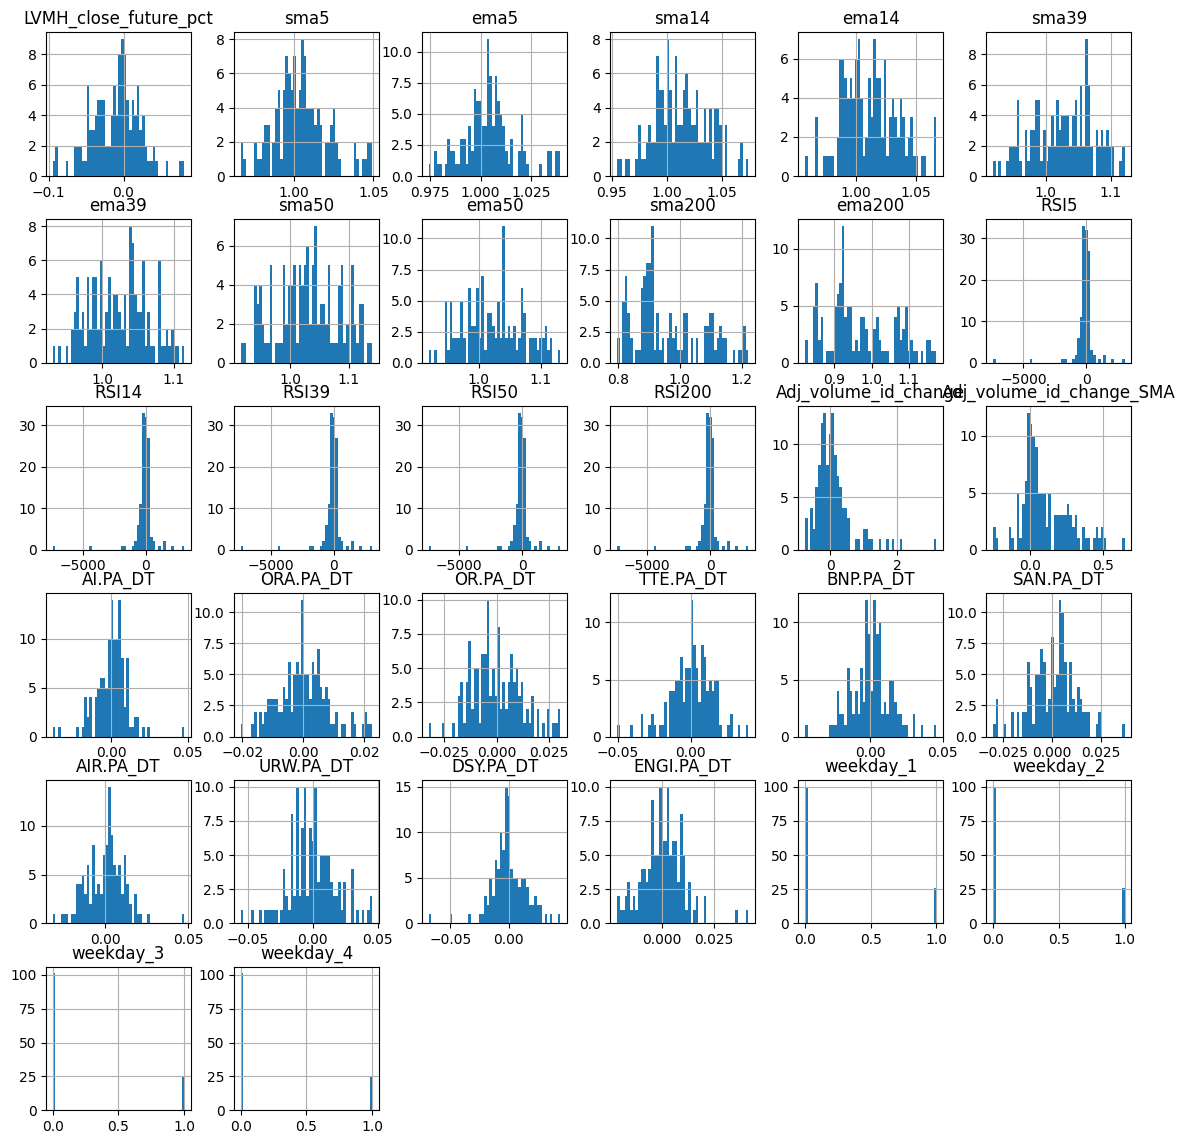

In [36]:
import matplotlib.pyplot as plt

clean_data.hist(bins =50, sharex=False, sharey=False, figsize=(14, 14))
plt.show()



# Préparons les données de test et de d'entrainemment
En série temporelle, les données de test doivent etre les plus récentes et les données de d'entrainement doivent etre les plus anciens.

In [41]:
y = clean_data['LVMH_close_future_pct']
x = clean_data.drop('LVMH_close_future_pct', axis =1)
validation_size = 0.25
train_size = int(len(x) * (1-validation_size))
x_train, x_test=x[0:train_size], x[train_size:len(x)]
y_train, y_test=y[0:train_size], y[train_size:len(x)]


In [42]:
x_train.shape


(94, 31)

In [43]:
x_test.shape

(32, 31)

In [45]:

# Les algorithmes à utiliser
seed = 123
models = []
# on va mettre tous les algoritmes dans un tuple
# regression linéire
models.append(('LR', {'model':LinearRegression()}))
# Algorithmes de LASSO
models.append(('LASSO', {'model':Lasso()}))
# Algorithmes de Knearest neighor
models.append(('KIN', {'model':DecisionTreeRegressor(random_state=seed)}))
#
models.append(('SVR', {'model':SVR()}))
#
models.append(('MLP', {'model':MLPRegressor(random_state=seed)}))
#
models.append(('ABR', {'model':AdaBoostRegressor(random_state=seed)}))
#
models.append(('XGBOOST', {'model':XGBRegressor(random_state=seed)}))
#
models.append(('GBR', {'model':GradientBoostingRegressor(random_state=seed)}))
#
models.append(('RFR', {'model':RandomForestRegressor(random_state=seed)}))
#
models.append(('ETR', {'model':ExtraTreesRegressor(random_state=seed)}))



In [46]:
algos_ml = dict(models)
algos_ml

{'LR': {'model': LinearRegression()},
 'LASSO': {'model': Lasso()},
 'KIN': {'model': DecisionTreeRegressor(random_state=123)},
 'SVR': {'model': SVR()},
 'MLP': {'model': MLPRegressor(random_state=123)},
 'ABR': {'model': AdaBoostRegressor(random_state=123)},
 'XGBOOST': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
             

Création d'une fonction ou commande  pour entrainer automatiquement les modèles avec une boucle for avec un objet sous forme de dictionnaire.

In [53]:
num_fodls = 5
scoring = 'neg_mean_squared_error'
kfold_results = []
for model_name in algos_ml.keys():
  kfold = KFold(n_splits=num_fodls)
  # conversion de 'neg_mean_squared_error' en valeur positive pour calculer  le RMSE (La racine carrée de MSE)
  # Plus l'erreur est faible plus le modèle est pperformant
  cv_results = np.sqrt(-1* cross_val_score(algos_ml[model_name]['model'], x_train, y_train, cv=kfold, scoring=scoring))
  kfold_results.append(cv_results)
  algos_ml[model_name]['Mean CV results'] = cv_results.mean()
  algos_ml[model_name]['Mean CV results'] = cv_results.std()

  fitted_model = algos_ml[model_name]['model'].fit(x_train, y_train)
  algos_ml[model_name]['RMSE TRAIN'] = np.sqrt(mean_squared_error(y_train, fitted_model.predict(x_train)))
  algos_ml[model_name]['RMSE TEST'] = np.sqrt(mean_squared_error(y_test, fitted_model.predict(x_test)))
  algos_ml[model_name]['R² TRAIN'] = r2_score(y_train, fitted_model.predict(x_train))
  algos_ml[model_name]['R² TEST'] = r2_score(y_test, fitted_model.predict(x_test))




In [54]:
algos_ml

{'LR': {'model': LinearRegression(),
  'Mean CV results': 0.032328187215862184,
  'RMSE TRAIN': 0.018936587047547342,
  'RMSE TEST': 0.03520552487760271,
  'R² TRAIN': 0.6258169884890454,
  'R² TEST': -0.1314442753835745},
 'LASSO': {'model': Lasso(),
  'Mean CV results': 0.006819448202022361,
  'RMSE TRAIN': 0.03095057157586155,
  'RMSE TEST': 0.033382501742098364,
  'R² TRAIN': 0.0004189912998565637,
  'R² TEST': -0.017300558562802104},
 'KIN': {'model': DecisionTreeRegressor(random_state=123),
  'Mean CV results': 0.010223152877982658,
  'RMSE TRAIN': 0.0,
  'RMSE TEST': 0.048123655035758856,
  'R² TRAIN': 1.0,
  'R² TEST': -1.1141156066726792},
 'SVR': {'model': SVR(),
  'Mean CV results': 0.008627955303830719,
  'RMSE TRAIN': 0.03130015956050187,
  'RMSE TEST': 0.03431102169266387,
  'R² TRAIN': -0.022289150784227774,
  'R² TEST': -0.07467914983938728},
 'MLP': {'model': MLPRegressor(random_state=123),
  'Mean CV results': 3.7818927945085647,
  'RMSE TRAIN': 22.053837049424246,
  

In [56]:
# Meilleur afficahage
result_metrics = pd.DataFrame.from_dict(
    algos_ml,
    'index')[['RMSE TRAIN', 'RMSE TEST', 'R² TRAIN', 'R² TEST', 'Mean CV results']]

with pd.option_context('display.precision', 3):
  best_print = result_metrics.sort_values(by='RMSE TEST', ascending=True)

best_print

,RMSE TRAIN,RMSE TEST,R² TRAIN,R² TEST,Mean CV results
ABR,1.259914e-02,0.026999,0.834361,0.334559,0.012636
ETR,5.664434e-17,0.027503,1.000000,0.309493,0.010526
XGBOOST,4.686961e-04,0.027900,0.999771,0.289420,0.012483
GBR,1.910792e-03,0.028749,0.996190,0.245528,0.012604
RFR,1.080067e-02,0.029081,0.878274,0.227964,0.013372
LASSO,3.095057e-02,0.033383,0.000419,-0.017301,0.006819
SVR,3.130016e-02,0.034311,-0.022289,-0.074679,0.008628
LR,1.893659e-02,0.035206,0.625817,-0.131444,0.032328
KIN,0.000000e+00,0.048124,1.000000,-1.114116,0.010223
MLP,2.205384e+01,6.122332,-507514.103836,-34216.268438,3.781893


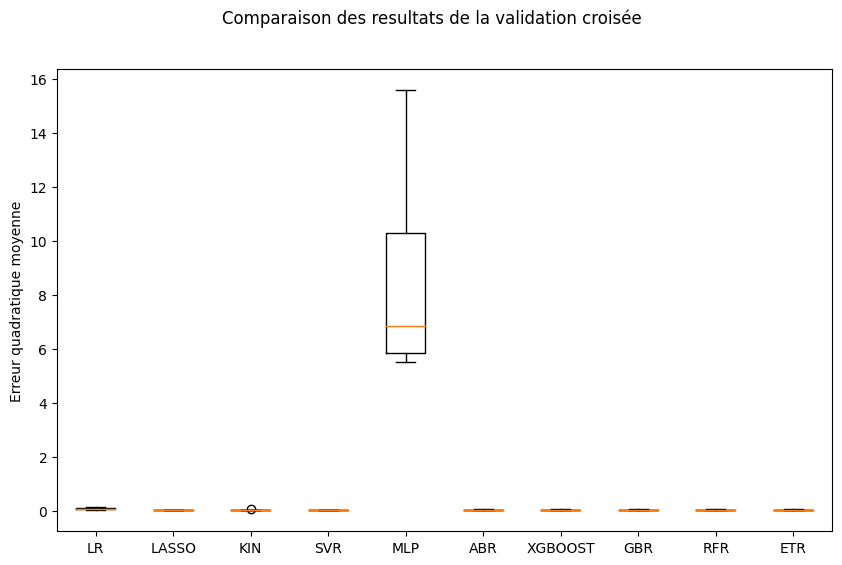

In [58]:
# Comparons graphiquementles résultats
fig = plt.figure()
fig.suptitle('Comparaison des resultats de la validation croisée')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(list(algos_ml.keys()))
fig.set_size_inches(10,6)
plt.ylabel('Erreur quadratique moyenne')
plt.show()

<Axes: >

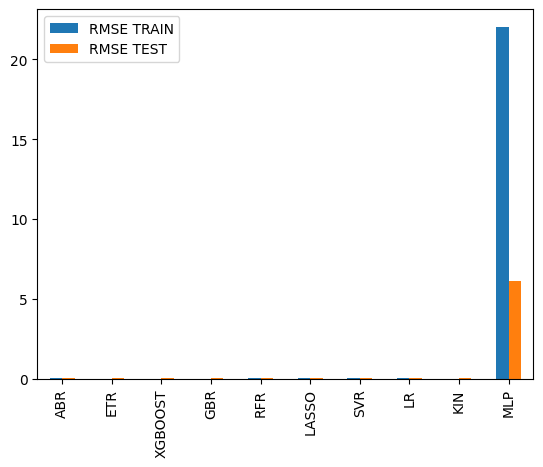

In [60]:
# Erreur quadratique moyenne sur des données de test
best_print[['RMSE TRAIN', "RMSE TEST"]].plot(kind='bar')

In [61]:
# Le choix du meilleur modèle
best_model = algos_ml['ABR']['model']
best_model

AdaBoostRegressor(random_state=123)

C'est le choix du modèle qui la petite erreur quadratique sur les données de test. Dans la réalité on peut faire d'autres test pour etre sur du meilleur modèle.

In [72]:
def evaluate_model(nom_model, predictions):
  plt.figure(figsize=(10,6))
  l1, = plt.plot(y_test.index, np.exp(y_test).cumprod(), label = 'Observations')
  l2, = plt.plot(y_test.index, predictions, label = 'Prediction')
  plt.legend(handles = [l1, l2])
  plt.show()

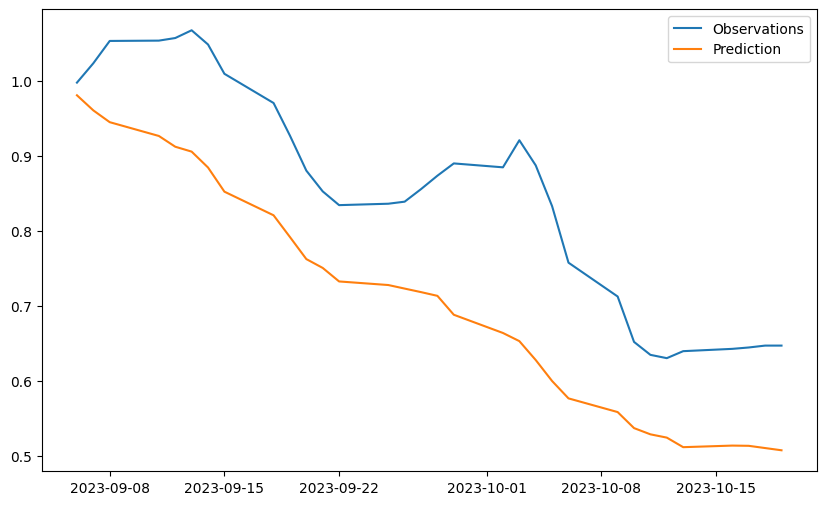

In [73]:
evaluate_model(best_model, predictions=np.exp(best_model.predict(x_test)).cumprod())

On constate que le modèle s'alligne au tendance des données réelles.

In [90]:
def evaluate_model2(nom_model, observations, predictions):
  plt.figure(figsize=(10,6))
  l1, = plt.plot(y_test.index, observations, label = 'Observations')
  l2, = plt.plot(y_test.index, predictions, label = 'Prediction')
  plt.legend(handles = [l1, l2])
  plt.show()

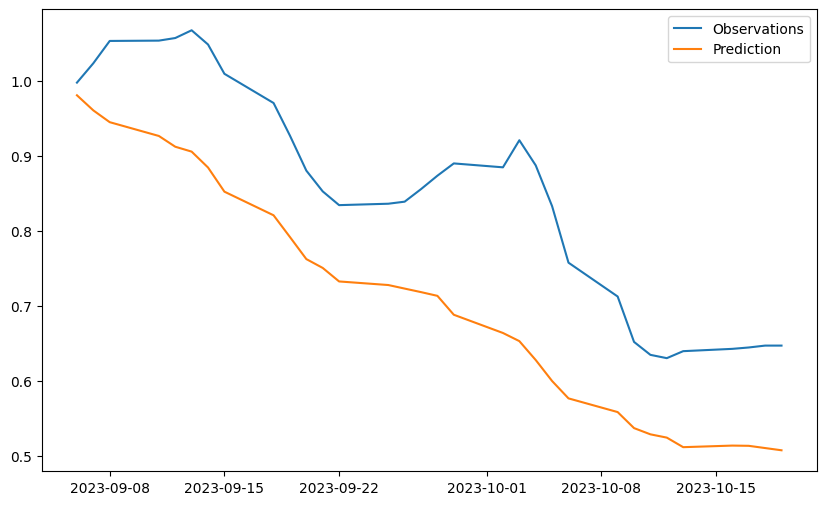

In [91]:
evaluate_model2(best_model, observations= np.exp(y_test).cumprod(), predictions=np.exp(best_model.predict(x_test)).cumprod())

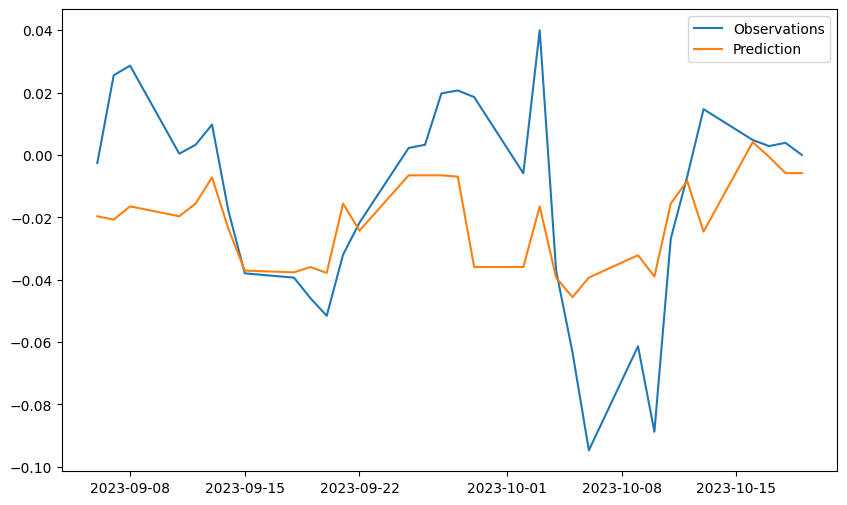

In [94]:
# pour avoir les rendements quotidiens
evaluate_model2(best_model, observations = y_test, predictions=best_model.predict(x_test))

On constate que la série prédicte est moin volatile que la série réelle. Mais la tendance y est.